In [115]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [117]:
len(words)

32033

In [118]:
chars = sorted(list(set(''.join(words))))

In [119]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [120]:
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [121]:
block_size = 3
X, Y = [], []

for w in words:
    print(w)
    context = [0] * block_size # list of 0s of blocksize
    for ch in w + '.':
        ix = stoi[ch] # character index
        X.append(context)
        Y.append(ix) #
        #print(''.join(itos[i] for i in context), '--->',itos[ix])
        context = context[1:] + [ix] # Take the first 2 items i context and add the ix at the end of the list

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [122]:
X.shape,X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [123]:
C = torch.randn((27,2))

In [124]:
C

tensor([[-0.3482,  0.5166],
        [ 0.5640,  0.2454],
        [-1.0712, -0.0905],
        [-0.5742,  1.9378],
        [-3.0011,  0.8220],
        [ 0.8371, -0.3236],
        [ 1.0024,  1.1500],
        [-0.6893, -0.2480],
        [-0.6885, -1.0785],
        [-0.4027, -0.4860],
        [ 0.8575,  2.1916],
        [-0.0866, -0.6632],
        [ 0.6119,  0.7014],
        [ 0.4598, -0.1245],
        [ 1.1165, -0.5370],
        [ 0.2427,  0.5461],
        [ 1.1598,  0.4795],
        [ 0.2488, -0.7716],
        [ 0.9454,  0.1929],
        [ 0.2935, -0.7178],
        [-1.2957,  2.2978],
        [-0.5335,  0.5658],
        [-0.2042, -1.5786],
        [ 0.0088, -0.4515],
        [ 1.6088,  1.1420],
        [ 0.1827, -0.9154],
        [-2.0870, -0.1588]])

In [125]:
C[5]

tensor([ 0.8371, -0.3236])

In [126]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([ 0.8371, -0.3236])

In [127]:
C[torch.tensor([3,4,5])]

tensor([[-0.5742,  1.9378],
        [-3.0011,  0.8220],
        [ 0.8371, -0.3236]])

In [128]:
C[X].shape

torch.Size([228146, 3, 2])

In [129]:
X[13,2]

tensor(1)

In [130]:
C[X][13,2]

tensor([0.5640, 0.2454])

In [131]:
C[1]

tensor([0.5640, 0.2454])

In [132]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [133]:
# Hidden layer
W1 = torch.randn((6,100)) # input will be emb.shape(x,y,z) ---> (y * z, The number of neurons we decide (hyperparameter))
b1 = torch.randn(100)

In [134]:
#emb @ W1 + b1 # does not work cause emb.shape(32,3,2) while W1 is (6, 100)
              # 32, 3, 2 x
              #  6, 100

In [135]:
logits = emb.view(-1,6) @ W1  + b1

Multiple ways to change the shape of the embedding

In [136]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]],1) # grab all examples, the [0,1,2] index, all indexes in 3rd dimension

tensor([[-0.3482,  0.5166, -0.3482,  0.5166, -0.3482,  0.5166],
        [-0.3482,  0.5166, -0.3482,  0.5166,  0.8371, -0.3236],
        [-0.3482,  0.5166,  0.8371, -0.3236,  0.4598, -0.1245],
        ...,
        [-2.0870, -0.1588, -2.0870, -0.1588,  0.1827, -0.9154],
        [-2.0870, -0.1588,  0.1827, -0.9154, -2.0870, -0.1588],
        [ 0.1827, -0.9154, -2.0870, -0.1588,  1.6088,  1.1420]])

In [137]:
view_opt = emb.view(-1,6)
cat_opt = torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]],1)

In [138]:
torch.equal(view_opt,cat_opt)

True

Not good because if we want to change the block size we will haveto manually do it in the code

Instead we should do torch.unbind https://pytorch.org/docs/stable/generated/torch.unbind.html
which removes a tensor dimension

Returns a tuple of all slices along a given dimension, already without it.

In [139]:
unbind_opt = torch.unbind(emb,1) # Same as the list in cat options

In [140]:
unbind_opt

(tensor([[-0.3482,  0.5166],
         [-0.3482,  0.5166],
         [-0.3482,  0.5166],
         ...,
         [-2.0870, -0.1588],
         [-2.0870, -0.1588],
         [ 0.1827, -0.9154]]),
 tensor([[-0.3482,  0.5166],
         [-0.3482,  0.5166],
         [ 0.8371, -0.3236],
         ...,
         [-2.0870, -0.1588],
         [ 0.1827, -0.9154],
         [-2.0870, -0.1588]]),
 tensor([[-0.3482,  0.5166],
         [ 0.8371, -0.3236],
         [ 0.4598, -0.1245],
         ...,
         [ 0.1827, -0.9154],
         [-2.0870, -0.1588],
         [ 1.6088,  1.1420]]))

In [141]:
([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]])

[tensor([[-0.3482,  0.5166],
         [-0.3482,  0.5166],
         [-0.3482,  0.5166],
         ...,
         [-2.0870, -0.1588],
         [-2.0870, -0.1588],
         [ 0.1827, -0.9154]]),
 tensor([[-0.3482,  0.5166],
         [-0.3482,  0.5166],
         [ 0.8371, -0.3236],
         ...,
         [-2.0870, -0.1588],
         [ 0.1827, -0.9154],
         [-2.0870, -0.1588]]),
 tensor([[-0.3482,  0.5166],
         [ 0.8371, -0.3236],
         [ 0.4598, -0.1245],
         ...,
         [ 0.1827, -0.9154],
         [-2.0870, -0.1588],
         [ 1.6088,  1.1420]])]

In [142]:
torch.cat(unbind_opt,1)

tensor([[-0.3482,  0.5166, -0.3482,  0.5166, -0.3482,  0.5166],
        [-0.3482,  0.5166, -0.3482,  0.5166,  0.8371, -0.3236],
        [-0.3482,  0.5166,  0.8371, -0.3236,  0.4598, -0.1245],
        ...,
        [-2.0870, -0.1588, -2.0870, -0.1588,  0.1827, -0.9154],
        [-2.0870, -0.1588,  0.1827, -0.9154, -2.0870, -0.1588],
        [ 0.1827, -0.9154, -2.0870, -0.1588,  1.6088,  1.1420]])

Even better way

# Next time

In [143]:
a = torch.arange(18)

In [144]:

a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [145]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [146]:
ras = a.view(3,3,2)
ras.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [147]:
h = torch.tanh(emb.view(-1,6) @ W1+b1)

In [148]:
h.shape

torch.Size([228146, 100])

In [149]:
# 32, 100
#  1, 100
# This will copy vertically for every one of the 32 rows the 1, 100 vector and do an element wise addition

Final layer

In [150]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [151]:
logits = h @ W2 + b2


In [152]:
logits.shape

torch.Size([228146, 27])

In [153]:
counts = logits.exp()
prob = counts / counts.sum(1,keepdims = True)

In [154]:
prob

tensor([[5.8187e-08, 1.4119e-14, 2.9240e-08,  ..., 4.7414e-09, 2.7272e-10,
         2.0406e-11],
        [2.1015e-05, 1.2756e-11, 5.8485e-05,  ..., 7.6678e-08, 4.3287e-11,
         6.4708e-14],
        [2.7221e-11, 5.3858e-04, 1.6492e-05,  ..., 2.0386e-01, 5.6641e-12,
         2.0958e-05],
        ...,
        [1.2973e-04, 1.9133e-11, 1.1841e-03,  ..., 6.1859e-11, 1.1386e-04,
         8.6992e-13],
        [3.2885e-20, 1.0645e-13, 1.9947e-06,  ..., 4.2118e-13, 3.1940e-13,
         7.8856e-11],
        [1.2986e-09, 2.3746e-13, 6.0731e-10,  ..., 1.2189e-13, 7.7020e-05,
         6.4440e-19]])

In [155]:
prob[0].sum()

tensor(1.)

In [156]:
#loss = -prob[torch.arange(32),Y].log().mean()
#loss

More respectable

In [157]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [158]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]

In [159]:
sum(p.nelement() for p in params)

3481

In [160]:
import torch.nn.functional as F

In [161]:
for p in params:
    p.requires_grad = True

In [162]:
# Overfitting a single batch of the data
for _ in range(1000):
    # Forwards pass
    emb = C[X]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #probs = counts / counts.sum(1, keepdim=True)
    #loss = -prob[torch.arange(32),Y].log().mean()
    # -----------> Same as
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    for p in params:
        p.data += -0.1 * p.grad

19.505229949951172
17.08448600769043
15.776532173156738
14.833341598510742
14.002607345581055
13.253263473510742
12.57991886138916
11.983102798461914
11.470495223999023
11.05185604095459
10.709587097167969
10.407631874084473
10.127808570861816
9.864364624023438
9.614503860473633
9.376440048217773
9.148944854736328
8.931111335754395
8.7222318649292
8.521749496459961
8.329227447509766
8.144325256347656
7.96679162979126
7.796451091766357
7.633185863494873
7.476909160614014
7.327521800994873
7.1848859786987305
7.048792362213135
6.918953895568848
6.795018672943115
6.6766037940979
6.563320159912109
6.454791069030762
6.350670337677002
6.250644207000732
6.154433250427246
6.061786651611328
5.9724836349487305
5.88632869720459
5.8031487464904785
5.722784996032715
5.6450958251953125
5.569948196411133
5.497215270996094
5.42678165435791
5.358537197113037
5.29237699508667
5.228204727172852
5.165929794311523
5.105469703674316
5.046749114990234
4.989701271057129
4.934263229370117
4.8803815841674805
4.8

KeyboardInterrupt: 

In [ ]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3437, 17.7879, 20.5832, 20.6042, 16.7390, 13.3437, 15.9747, 14.1889,
        15.9158, 18.3894, 15.9409, 20.9284, 13.3437, 17.1212, 17.1498, 20.0637,
        13.3437, 16.4564, 15.1328, 17.0537, 18.5905, 15.9655, 10.8739, 10.6874,
        15.5062, 13.3437, 16.2394, 16.9563, 12.7426, 16.2141, 19.0840, 16.0213],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

We are unable to completely overfit and make the loss be completely 0 because
of the structure where we have the start of a name 

... ---> [a,b,c,d,e,f,...,y,z]

This is because these are supposed to be equally likely outcomes for the exact same input
But we are very close in the cases where there is a unique input for a unique output

In [ ]:
# Its better to use F cross entrop
# Pytorh will not create intermediate tensors which is fairly inefficient
# Instead it will cluster up all the operations and will have fused kernels
# that very effciently evaluate these expressions that are clustered mathematical operations

# Backward pass can be made more efficient
# We don't have to apply chain rule individually through each tensor
# instead we can go directly because the expression gets simplified mathematically

# Under the hood it can be better behaved

logits = torch.tensor([-2,-3,0,5])
counts = logits.exp()
probs = counts / counts.sum()
print(probs)

# At very positive logits you start to run into trouble

logits = torch.tensor([-100,-3,0,100])
counts = logits.exp()
probs = counts / counts.sum()
print(probs)

# This is because the way that exp works
# If you pass a very negative number you get a number  very near 0
# but if you pass a very big number we run  out of range in the float that represents our values

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])
tensor([0., 0., 0., nan])


In [ ]:
logits = torch.tensor([-100,-3,0,100]) - 100 # offsets will create the same probabilities
counts = logits.exp()
probs = counts / counts.sum()
print(probs)
# Pytorch will subtract 100

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])


# Using the full dataset to optimize the neural net

In [ ]:
block_size = 3
X, Y = [], []

for w in words:
    print(w)
    context = [0] * block_size # list of 0s of blocksize
    for ch in w + '.':
        ix = stoi[ch] # character index
        X.append(context)
        Y.append(ix) #
        #print(''.join(itos[i] for i in context), '--->',itos[ix])
        context = context[1:] + [ix] # Take the first 2 items i context and add the ix at the end of the list

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
# Initializing weights
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]

In [ ]:
C[X[0]], C[X[0]].shape # The embbeding for ... with shape 3, 2
                       # where each character is represented by a 2d vector
                       # Notice that they are all the same
                       # This is because we have the same character 3 times in our sequence

(tensor([[ 0.3797, -0.3593],
         [ 0.3797, -0.3593],
         [ 0.3797, -0.3593]], grad_fn=<IndexBackward0>),
 torch.Size([3, 2]))

In [180]:
ix =torch.randint(0,X.shape[0],(32,)) # we take at random 32 indexes from 0 to the size of X which are used to take at random 32 samples from the dataset
C[X[ix]]

tensor([[[ 0.1679, -0.3464],
         [-0.1447, -0.1911],
         [-0.1447, -0.1911]],

        [[-0.0053, -0.3073],
         [-0.1608, -0.3741],
         [ 0.0785, -0.3169]],

        [[-0.0083, -0.3226],
         [ 0.3859,  2.1785],
         [-0.0083, -0.3226]],

        [[ 0.3797, -0.3593],
         [ 0.3797, -0.3593],
         [ 0.1679, -0.3464]],

        [[-0.0083, -0.3226],
         [-0.1682, -0.3544],
         [-0.1745, -0.2302]],

        [[ 0.3797, -0.3593],
         [-0.1998, -0.3439],
         [ 0.1679, -0.3464]],

        [[ 0.1679, -0.3464],
         [-0.1447, -0.1911],
         [-0.0083, -0.3226]],

        [[-0.1044, -0.2340],
         [-0.1154, -0.4268],
         [ 0.1225, -0.3495]],

        [[ 0.3797, -0.3593],
         [-0.1682, -0.3544],
         [ 0.1679, -0.3464]],

        [[-0.1496, -0.3509],
         [-0.0083, -0.3226],
         [-0.0064, -0.4288]],

        [[-0.2430, -0.3420],
         [ 0.1679, -0.3464],
         [-0.1044, -0.2340]],

        [[ 0.3797, -0

In [ ]:
for p in params:
    p.requires_grad = True

In [250]:
for _ in range(100):
    # minimatch construct
    ix = torch.randint(0,X.shape[0], (32,))
    # Forwards pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #probs = counts / counts.sum(1, keepdim=True)
    #loss = -prob[torch.arange(32),Y].log().mean()
    # -----------> Same as
    loss = F.cross_entropy(logits,Y[ix]) # loss for minibatch
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    for p in params:
        p.data += -0.05 * p.grad
print(f"Loss for minibatch:{loss.item()}")

Loss for minibatch:2.289792776107788


In [251]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y) # loss for minibatch
print(loss)

tensor(2.4566, grad_fn=<NllLossBackward0>)


In [263]:
# How do we gain cofidence that we are stepping at the right speed?
# Works as follows


# 1: Reset parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
for p in params:
    p.requires_grad = True

In [ ]:
# 2: Print in every step
for _ in range(100):
    # minimatch construct
    ix = torch.randint(0,X.shape[0], (32,))
    # Forwards pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix]) # loss for minibatch
    print(loss.item())
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    for p in params:
        p.data += -10 * p.grad #2.1 Small lr 0.000001 to low, loss is barely decreasing
                               #2.2 Lets try to find the place where the loss explodes e.g -10 is to big
                               #2.3 Best learning rate is somewhere inbetween



20.16202163696289
67.99449920654297
152.09136962890625
44.432987213134766
105.45527648925781
79.24957275390625
60.77167510986328
48.4434700012207
66.13062286376953
41.628902435302734
56.909080505371094
65.7989501953125
69.23348236083984
58.233646392822266
71.21056365966797
91.47106170654297
67.29305267333984
62.88510513305664
73.67120361328125
64.1819076538086
91.86506652832031
74.94975280761719
61.68842697143555
56.98920822143555
75.8052978515625
59.48162078857422
71.29183197021484
40.856781005859375
47.747459411621094
38.90105056762695
52.12281036376953
49.482566833496094
50.66763687133789
89.89708709716797
61.87709045410156
57.761268615722656
62.508087158203125
80.25159454345703
69.2881851196289
66.66282653808594
69.16796875
98.17365264892578
58.91749572753906
62.868343353271484
55.011863708496094
41.017398834228516
83.11396789550781
73.352783203125
42.8154411315918
61.312591552734375
70.79397583007812
52.030277252197266
54.42441940307617
41.74431228637695
39.16925811767578
36.56680

In [ ]:
# 3 Step linearly between the exponents of the learning rates
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

# Running with different lr and keeping track to see the best

In [ ]:
# 4: Run with lr decay where you 

In [288]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
for p in params:
    p.requires_grad = True

In [289]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
reversed(lrs)

tensor([1.0000, 0.9931, 0.9863, 0.9795, 0.9727, 0.9660, 0.9594, 0.9528, 0.9462,
        0.9397, 0.9332, 0.9268, 0.9204, 0.9140, 0.9077, 0.9015, 0.8953, 0.8891,
        0.8830, 0.8769, 0.8708, 0.8648, 0.8589, 0.8530, 0.8471, 0.8412, 0.8355,
        0.8297, 0.8240, 0.8183, 0.8127, 0.8071, 0.8015, 0.7960, 0.7905, 0.7850,
        0.7796, 0.7743, 0.7689, 0.7636, 0.7584, 0.7531, 0.7480, 0.7428, 0.7377,
        0.7326, 0.7275, 0.7225, 0.7176, 0.7126, 0.7077, 0.7028, 0.6980, 0.6932,
        0.6884, 0.6837, 0.6789, 0.6743, 0.6696, 0.6650, 0.6604, 0.6559, 0.6513,
        0.6469, 0.6424, 0.6380, 0.6336, 0.6292, 0.6249, 0.6206, 0.6163, 0.6120,
        0.6078, 0.6036, 0.5995, 0.5954, 0.5913, 0.5872, 0.5831, 0.5791, 0.5751,
        0.5712, 0.5672, 0.5633, 0.5594, 0.5556, 0.5517, 0.5479, 0.5442, 0.5404,
        0.5367, 0.5330, 0.5293, 0.5257, 0.5221, 0.5185, 0.5149, 0.5113, 0.5078,
        0.5043, 0.5008, 0.4974, 0.4940, 0.4906, 0.4872, 0.4838, 0.4805, 0.4772,
        0.4739, 0.4706, 0.4674, 0.4642, 

In [290]:
lri = []
lres = []
losses = []
for i in range(1000):
    # minimatch construct
    ix = torch.randint(0,X.shape[0], (32,))
    # Forwards pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix]) # loss for minibatch
    print(loss.item())
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    # Update
    lr = lrs[i]
    for p in params:
        p.data += -lr * p.grad 
    
    # track stats
    lri.append(lr)
    lres.append(lre[i])

    losses.append(loss.item())


19.906278610229492
20.64015007019043
20.682079315185547
20.508054733276367
20.160400390625
17.146196365356445
19.29680824279785
20.106088638305664
18.175556182861328
20.92109489440918
18.940317153930664
18.1345157623291
21.98766326904297
19.59169578552246
17.103532791137695
16.025165557861328
20.542383193969727
17.947721481323242
16.378284454345703
16.193973541259766
20.7054443359375
21.866758346557617
17.27634620666504
19.110376358032227
19.126815795898438
21.118486404418945
20.50429916381836
21.9571533203125
16.208824157714844
16.052398681640625
18.408241271972656
16.69700813293457
16.36286163330078
17.6894588470459
15.863638877868652
21.101238250732422
17.99970245361328
16.63787841796875
18.41893768310547
18.952211380004883
18.636150360107422
16.848342895507812
19.12649917602539
19.532011032104492
15.971314430236816
17.540372848510742
20.07301902770996
17.597572326660156
15.877182960510254
17.573352813720703
15.766454696655273
19.605018615722656
16.789201736450195
18.966205596923828

Text(0, 0.5, 'Losses')

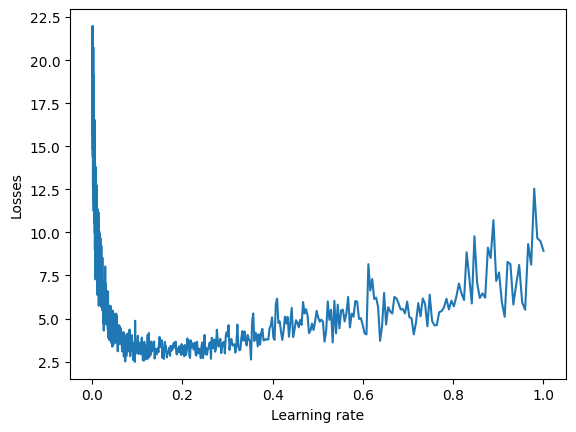

In [291]:
plt.plot(lri,losses) # Learning rate
plt.xlabel("Learning rate")
plt.ylabel("Losses")

Text(0, 0.5, 'Losses')

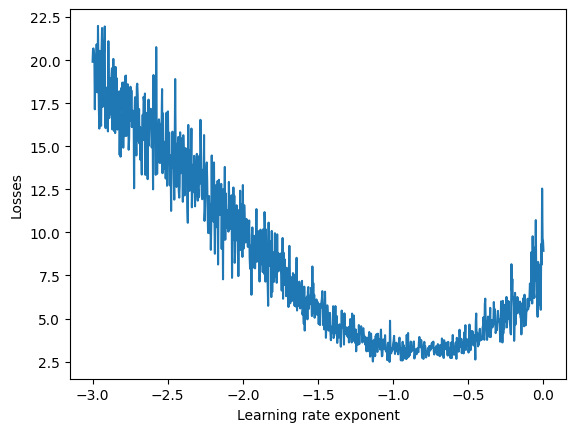

In [292]:
plt.plot(lre,losses) # Exponent of the learning rate
plt.xlabel("Learning rate exponent")
plt.ylabel("Losses")

In [295]:
# From the plots we can see that the exponent of the lre we want to use is around -1
# So we can set the lr as 10 **-1 and have some confidence that this is a good learning rate
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
for p in params:
    p.requires_grad = True

In [307]:
for i in range(10000):
    # minimatch construct
    ix = torch.randint(0,X.shape[0], (32,))
    # Forwards pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix]) # loss for minibatch
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    # Update
    lr = 0.01
    for p in params:
        p.data += -lr * p.grad 
print(loss.item())    

2.557913303375244


In [308]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y) # loss for minibatch
print(loss)

tensor(2.3530, grad_fn=<NllLossBackward0>)


In [302]:
10**-1

0.1

# Splitting the dataset into train, validation, test

In [313]:
def build_dataset(words,b_size):
    block_size = b_size
    X, Y = [], []

    for w in words:
        context = [0] * block_size # list of 0s of blocksize
        for ch in w + '.':
            ix = stoi[ch] # character index
            X.append(context)
            Y.append(ix) #
            #print(''.join(itos[i] for i in context), '--->',itos[ix])
            context = context[1:] + [ix] # Take the first 2 items i context and add the ix at the end of the list

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1],3)
Xdev, Ydev = build_dataset(words[n1:n2],3)
Xte, Yte = build_dataset(words[n2:],3)

In [315]:
n1

25626

In [314]:
Xtr.shape, Ytr.shape, Xdev.shape, Ydev.shape, Xte.shape, Yte.shape

(torch.Size([182441, 3]),
 torch.Size([182441]),
 torch.Size([22902, 3]),
 torch.Size([22902]),
 torch.Size([22803, 3]),
 torch.Size([22803]))

In [316]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
for p in params:
    p.requires_grad = True

In [318]:
for i in range(30000):
    # minimatch construct
    ix = torch.randint(0,Xtr.shape[0], (32,))
    # Forwards pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix]) # loss for minibatch
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    # Update
    lr = 0.01
    for p in params:
        p.data += -lr * p.grad 
print(loss.item())    

2.3460118770599365


In [319]:
# Evaluate on the Xdev set

emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev) # loss for minibatch
print(loss)

tensor(2.4583, grad_fn=<NllLossBackward0>)


In [320]:
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte) # loss for minibatch
print(loss)

tensor(2.4589, grad_fn=<NllLossBackward0>)


Our network is very small and we are currently underfitting so we expect to make imporvements by scalling the network

In [325]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
print(sum(p.nelement() for p in params))
for p in params:
    p.requires_grad = True

10281


In [ ]:
lri = []
losses = []
stepi = []

for i in range(30000):
    # minimatch construct
    ix = torch.randint(0,Xtr.shape[0], (32,))
    # Forwards pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 300)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix]) # loss for minibatch
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    # Update
    lr = 0.01
    for p in params:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    losses.append(loss.item())
    stepi.append(i) 
print(loss.item())    

2.3371944427490234


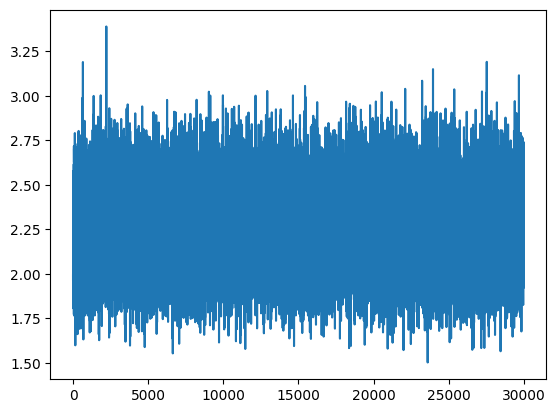

In [350]:
plt.plot(stepi,losses)

In [348]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev) # loss for minibatch
print(loss)

tensor(2.2558, grad_fn=<NllLossBackward0>)


In [349]:
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte) # loss for minibatch
print(loss)

tensor(2.2614, grad_fn=<NllLossBackward0>)


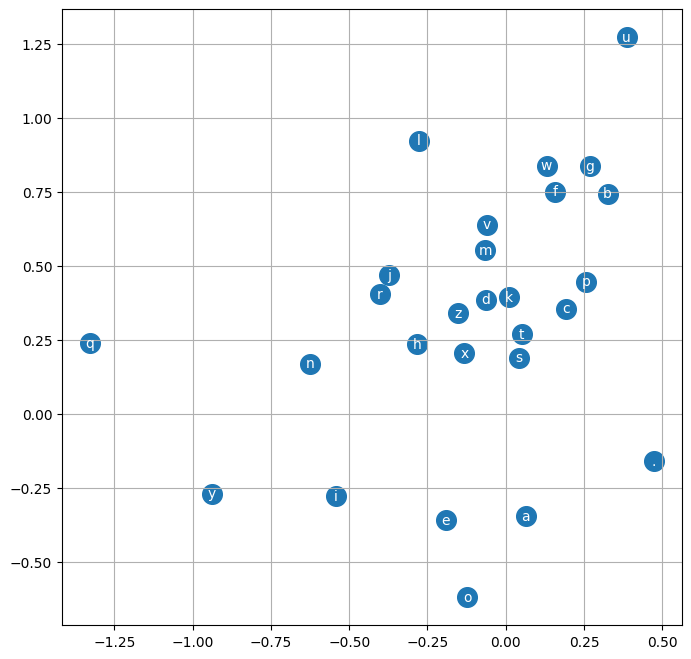

In [ ]:
# The embedings that were learned by the neural net
# X and Y coordonates are the two embedding locations for each of these characters 
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):

    plt.text(C[i,0].item(), C[i,1].item(),itos[i], ha = "center", va="center",color = "white")
plt.grid("minor")

In [ ]:
# lets do for 10 dim embeddings


g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g) 
W1 = torch.randn((30,200), generator = g) # 3 times 10
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
print(sum(p.nelement() for p in params))
for p in params:
    p.requires_grad = True

33456


In [372]:
C[Xtr[0]].shape

torch.Size([3, 10])

In [373]:
lri = []
losses = []
stepi = []

In [374]:


for i in range(300000):
    # minimatch construct
    ix = torch.randint(0,Xtr.shape[0], (32,))
    # Forwards pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 300)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix]) # loss for minibatch
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    # Update
    lr = 0.1 if i  < 100000 else 0.01
    for p in params:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    losses.append(loss.log10().item())
    stepi.append(i) 
print(loss.item())    

2.055133819580078


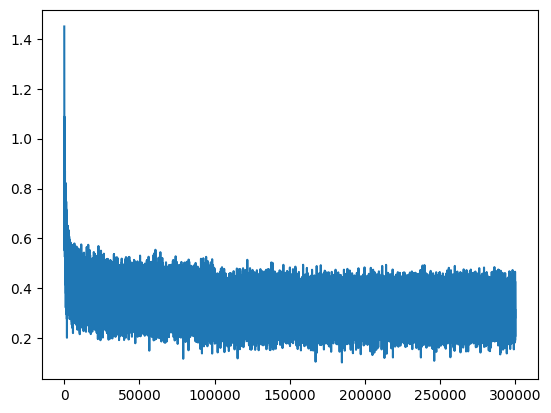

In [375]:
plt.plot(stepi,losses)

In [376]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev) # loss for minibatch
print(loss)

tensor(2.1626, grad_fn=<NllLossBackward0>)


In [379]:
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte) # loss for minibatch
print(loss)

tensor(2.1569, grad_fn=<NllLossBackward0>)


In [ ]:
# To surpass this loss I am able to
# 1: change the number of neurons
# 2: change the dimensionality of the embedding lookup table
# 3: change the number of characters that are feeding into the neural net fourgram fivegram
# 4: details of optimization:
                            # How long are we running
                            # learning rate
                            # how does it change over time and how does it decay
                            # batchsize

In [378]:
# Sampling from the model

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
kayanna.
elve.
hayla.
remman.
emdraega.
dered.
elin.
shy.
jennedennestanar.
kayzion.
kalin.
shabergahimiel.
kindrenlee.
xoberlyn.
brence.
ryyah.
faeha.
kay.
myskaydenhia.


In [472]:
# Change the number of characters that we are feeding into it.
# median is 6.5 so lets go with 7

def build_dataset(words,b_size):
    block_size = b_size
    X, Y = [], []

    for w in words:
        context = [0] * block_size # list of 0s of blocksize
        for ch in w + '.':
            ix = stoi[ch] # character index
            X.append(context)
            Y.append(ix) #
            #print(''.join(itos[i] for i in context), '--->',itos[ix])
            context = context[1:] + [ix] # Take the first 2 items i context and add the ix at the end of the list

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

block_size = 3
Xtr, Ytr = build_dataset(words[:n1],block_size)
Xdev, Ydev = build_dataset(words[n1:n2],block_size)
Xte, Yte = build_dataset(words[n2:],block_size)

In [506]:
# Change  dim of embedding lookup table and the number of neurons
# lets do for 27*2 dim embeddings


g = torch.Generator().manual_seed(2147483647)
C = torch.ones((27,27))
W1 = torch.randn((block_size*C.shape[1],block_size*C.shape[1]), generator = g) # 7 times 27
b1 = torch.randn(block_size*C.shape[1], generator = g)
W2 = torch.randn((block_size*C.shape[1],27), generator = g)
b2 = torch.randn(27,generator=g)
params = [C,W1,b1,W2,b2]
print(sum(p.nelement() for p in params))
for p in params:
    p.requires_grad = True

9585


In [507]:
lri = []
losses = []
stepi = []

In [508]:
 ix = torch.randint(0,Xtr.shape[0], (60,))
C[Xtr[ix]].shape

torch.Size([60, 3, 27])

In [514]:


for i in range(100000):

    # minimatch construct
    ix = torch.randint(0,Xtr.shape[0], (128,))
    # Forwards pass
    emb = C[Xtr[ix]] # 256, 7, 27 # block_size * C.shape[1]
    h = torch.tanh(emb.view(-1,block_size * C.shape[1]) @ W1 + b1) # (32, 300)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix]) # loss for minibatch
    if i == 0:
        print(loss.item())
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()
    # Update
    lr = 0.01 if i  < 50000 else 0.001
    for p in params:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    losses.append(loss.log10().item())
    stepi.append(i)
    
print(loss.item())    

2.1752147674560547
1.933610200881958


1.9775164127349854 LOSS


In [510]:
C

tensor([[ 8.8003e-01,  4.3427e-01,  1.5946e-01,  1.2297e+00,  8.2430e-01,
          1.4228e-01,  8.3890e-01,  8.0600e-01,  6.3171e-01,  7.3805e-01,
          4.8191e-01,  8.4149e-01,  1.7859e-01,  2.7428e-01, -5.5052e-02,
          3.6806e-01,  2.9976e-01,  6.3892e-02, -3.4294e-01,  8.9885e-01,
          1.0362e-01,  3.0014e-01,  8.5755e-01,  1.2814e+00,  7.7584e-01,
          6.8061e-01,  4.5384e-01],
        [ 7.2145e-01, -5.6160e-02,  9.7746e-01,  1.3045e+00,  9.9986e-01,
          7.7949e-01,  5.9076e-01,  6.4064e-01,  3.4734e-01,  7.6971e-01,
          5.8929e-01,  8.2833e-01, -6.1131e-02,  1.0951e+00,  5.4120e-01,
          9.0982e-01,  9.5605e-01,  5.2864e-01,  7.0705e-01,  8.4622e-01,
          6.4667e-01,  5.0797e-01,  5.9662e-01,  7.9374e-01,  1.3877e+00,
          3.0378e-01,  3.4073e-01],
        [ 2.6129e-01,  3.8088e-01,  1.1774e+00,  2.9771e-01,  9.2027e-01,
          1.4493e+00,  9.9736e-01,  8.5848e-01,  8.3600e-01,  6.4500e-01,
          1.0608e+00,  1.1590e+00,  1.00

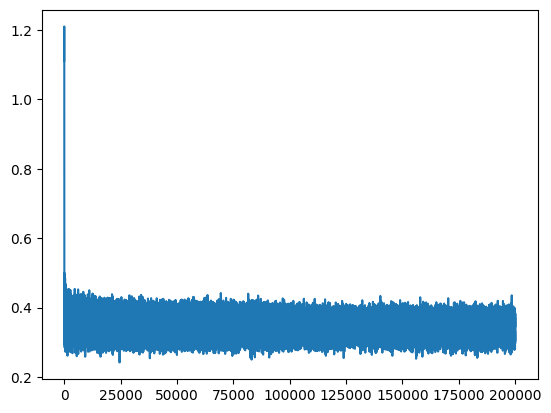

In [515]:
plt.plot(stepi,losses)

In [516]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,block_size * C.shape[1]) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev) # loss for minibatch
print(loss)

tensor(2.2220, grad_fn=<NllLossBackward0>)


tensor(2.1395, grad_fn=<NllLossBackward0>)


In [517]:
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1,block_size * C.shape[1]) @ W1 + b1) # (32, 100) # block_size * 27
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte) # loss for minibatch
print(loss)

tensor(2.2288, grad_fn=<NllLossBackward0>)


tensor(2.1584, grad_fn=<NllLossBackward0>)


In [519]:
# Sampling from the model

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(10):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
kmyannieel.
ndyn.
alarethan.
endraege.
zered.
elii.
shi.
jen.
edelieananarleptesmalya.
